In [247]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import scipy.stats as stats
import re
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

%matplotlib inline


In [248]:

sns.set_style("white")

emp = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

emp1 = emp

In [249]:
# Setting non-numeric values to 0, 1, or (for marital status) 2

def attrition_num(x): 
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    
num_attrition = emp['Attrition'].apply(lambda x: attrition_num(x))
emp1['Attrition'] = num_attrition

def gender_num(x): 
    if x == 'Male':
        return 0
    elif x == 'Female':
        return 1
    
num_gender = emp['Gender'].apply(lambda x: gender_num(x))
emp1['Gender'] = num_gender

def marital_num(x): 
    if x == 'Single':
        return 0
    elif x == 'Divorced':
        return 1
    elif x == 'Married':
        return 2
    
num_marital = emp['MaritalStatus'].apply(lambda x: marital_num(x))
emp1['MaritalStatus'] = num_marital

def overtime_num(x): 
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    
num_overtime = emp['OverTime'].apply(lambda x: overtime_num(x))
emp1['OverTime'] = num_overtime

# Drop the extraneous and/or un-convertable text-based columns; only do it once.

emp1 = emp1.drop('BusinessTravel', 1)
emp1 = emp1.drop('Department', 1)
emp1 = emp1.drop('EducationField', 1)
emp1 = emp1.drop('EmployeeCount', 1)
emp1 = emp1.drop('JobRole', 1)
emp1 = emp1.drop('Over18', 1)
emp1 = emp1.drop('StandardHours', 1)

# Adding jitter

emp_jittered = emp1.dropna()

jitter = pd.DataFrame(
    np.random.uniform(0, 0, size=(emp_jittered.shape)),
    columns=emp_jittered.columns
)

emp_jittered = emp_jittered.add(jitter)

In [138]:
#Non-numeric separated out; MUTUALLY EXCLUSIVE with the previous cell

# Creating a separate df to hold the non-numeric variables
emp_nn = emp.loc[:, ['Attrition', 'Gender', 'MaritalStatus', 'OverTime']]

# Removing non-numeric from emp1
emp1 = emp1.drop(['Attrition', 'Gender', 'MaritalStatus', 'OverTime'], 1)

# Drop the extraneous and/or un-convertable text-based columns; only do it once.

emp1 = emp1.drop('BusinessTravel', 1)
emp1 = emp1.drop('Department', 1)
emp1 = emp1.drop('EducationField', 1)
emp1 = emp1.drop('EmployeeCount', 1)
emp1 = emp1.drop('JobRole', 1)
emp1 = emp1.drop('Over18', 1)
emp1 = emp1.drop('StandardHours', 1)

# Adding jitter

emp_jittered = emp1.dropna()

jitter = pd.DataFrame(
    np.random.uniform(-.1, .1, size=(emp_jittered.shape)),
    columns=emp_jittered.columns
)

emp_jittered = emp_jittered.add(jitter)

# Joining the non-numeric with the jittered set
emp_jittered = emp_jittered.join(emp_nn)

In [250]:
emp_correlation_try1 = emp_jittered.loc[:, ['Attrition', 'DailyRate', 'HourlyRate', 'MonthlyIncome','MonthlyRate','PercentSalaryHike']]
emp_correlation_try2 = emp_jittered.loc[:, ['Attrition', 'DistanceFromHome', 'OverTime', 'StockOptionLevel', 'Education', 'MaritalStatus']]
emp_correlation_try3 = emp_jittered.loc[:, ['Attrition', 'Age', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
emp_correlation_try4 = emp_jittered.loc[:, ['Attrition', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel','JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']]




In [251]:
# emp.head(10)
emp_jittered.head(10)
# emp1.head(10)
#emp_attr_pay.head(10)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1.0,1102.0,1.0,2.0,1.0,2.0,1.0,94.0,3.0,2.0,4.0,0.0,5993.0,19479.0,8.0,1.0,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,0.0,279.0,8.0,1.0,2.0,3.0,0.0,61.0,2.0,2.0,2.0,2.0,5130.0,24907.0,1.0,0.0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,1.0,1373.0,2.0,2.0,4.0,4.0,0.0,92.0,2.0,1.0,3.0,0.0,2090.0,2396.0,6.0,1.0,15.0,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,0.0,1392.0,3.0,4.0,5.0,4.0,1.0,56.0,3.0,1.0,3.0,2.0,2909.0,23159.0,1.0,1.0,11.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,0.0,591.0,2.0,1.0,7.0,1.0,0.0,40.0,3.0,1.0,2.0,2.0,3468.0,16632.0,9.0,0.0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0
5,32.0,0.0,1005.0,2.0,2.0,8.0,4.0,0.0,79.0,3.0,1.0,4.0,0.0,3068.0,11864.0,0.0,0.0,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,7.0,3.0,6.0
6,59.0,0.0,1324.0,3.0,3.0,10.0,3.0,1.0,81.0,4.0,1.0,1.0,2.0,2670.0,9964.0,4.0,1.0,20.0,4.0,1.0,3.0,12.0,3.0,2.0,1.0,0.0,0.0,0.0
7,30.0,0.0,1358.0,24.0,1.0,11.0,4.0,0.0,67.0,3.0,1.0,3.0,1.0,2693.0,13335.0,1.0,0.0,22.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0
8,38.0,0.0,216.0,23.0,3.0,12.0,4.0,0.0,44.0,2.0,3.0,3.0,0.0,9526.0,8787.0,0.0,0.0,21.0,4.0,2.0,0.0,10.0,2.0,3.0,9.0,7.0,1.0,8.0
9,36.0,0.0,1299.0,27.0,3.0,13.0,3.0,0.0,94.0,3.0,2.0,3.0,2.0,5237.0,16577.0,6.0,0.0,13.0,3.0,2.0,2.0,17.0,3.0,2.0,7.0,7.0,7.0,7.0


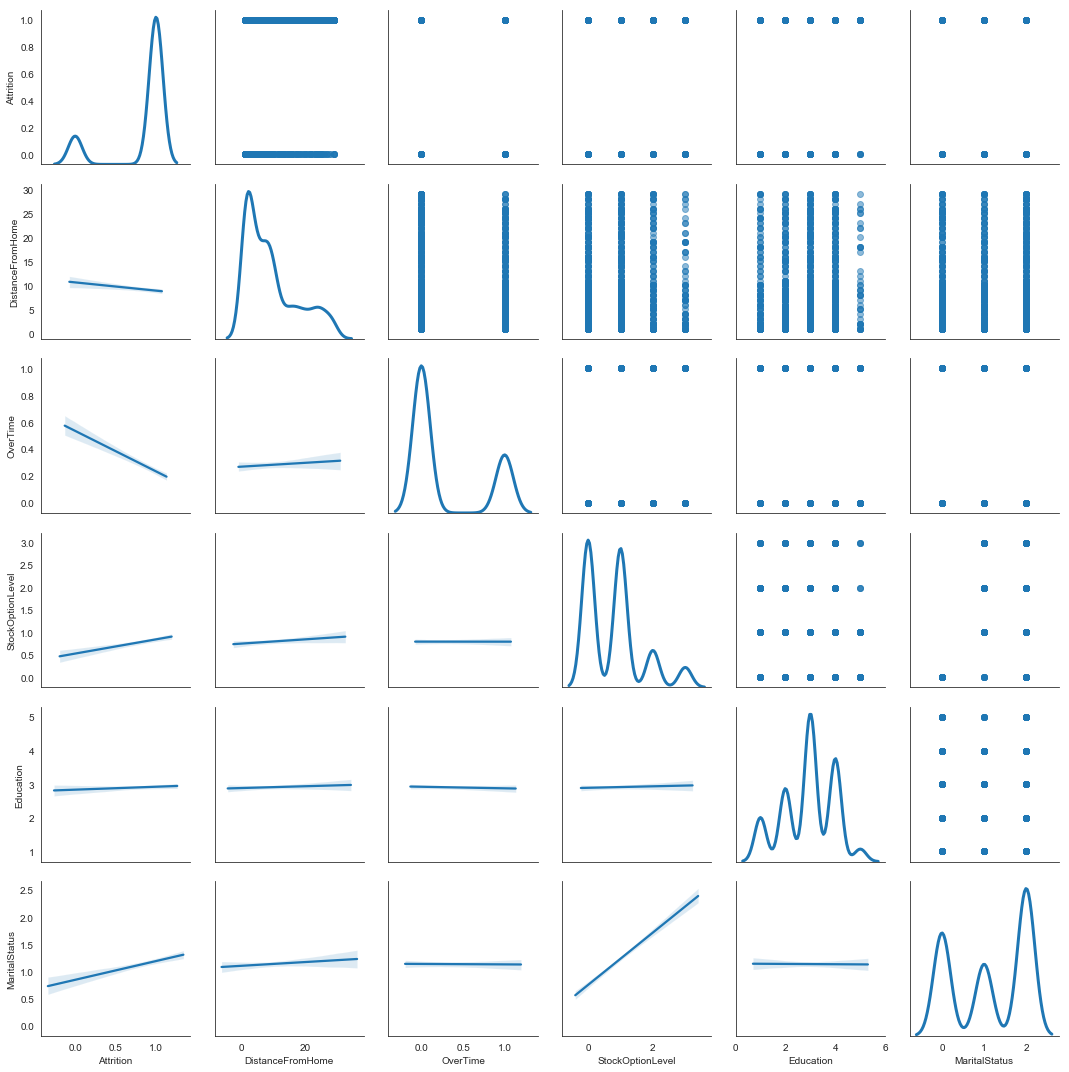

In [176]:
g = sns.PairGrid(emp_correlation_try2.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [181]:
corrmat0 = emp_jittered.corr()
# print(corrmat0)


                               Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000   0.159205   0.010661         -0.001686   
Attrition                 0.159205   1.000000   0.056652         -0.077924   
DailyRate                 0.010661   0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686  -0.077924  -0.004985          1.000000   
Education                 0.208034   0.031373  -0.016806          0.021042   
EmployeeNumber           -0.010145   0.010577  -0.050990          0.032916   
EnvironmentSatisfaction   0.010146   0.103369   0.018355         -0.016075   
Gender                    0.036311   0.029453   0.011716          0.001851   
HourlyRate                0.024287   0.006846   0.023381          0.031131   
JobInvolvement            0.029820   0.130016   0.046135          0.008783   
JobLevel                  0.509604   0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892   0.103481   0.030571        

Using a dataset of your choice, select an outcome variable (Attrition) and then pick four or five other variables (one to two categorical [Overtime], three to four continuous [Monthly Income, Total Working Years, Environment Satisfaction, Job Involvement]) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.



In [316]:
features = pd.DataFrame(emp_jittered['EmployeeNumber'])


In [331]:
# first we need to add the modified attrition variable in
features['attrition'] = emp_jittered['Attrition']

In [318]:
# then add in the modified overtiem variable
features['overtime'] = emp_jittered['OverTime']

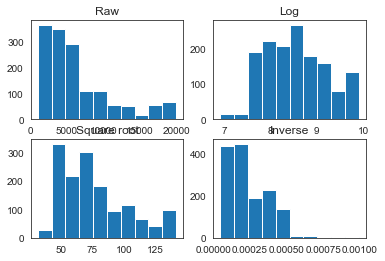

In [319]:
# checking out the Monthly Income stat in various transformations...
fig = plt.figure()

fig.add_subplot(221)
plt.hist(emp_jittered['MonthlyIncome'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(emp_jittered['MonthlyIncome'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(emp_jittered['MonthlyIncome'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/emp_jittered['MonthlyIncome'].dropna())
plt.title('Inverse')
plt.show()

# looks like the log version has a more-normal-distribution-like curve, so let's add that in.

features['log_monthlyincome'] = np.log(emp_jittered['MonthlyIncome'])

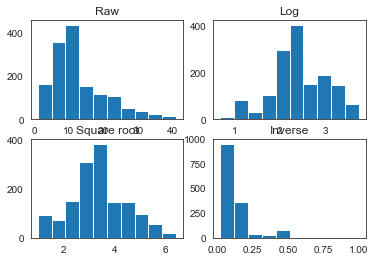

In [320]:
# Doing the same for total working years...
fig = plt.figure()

fig.add_subplot(221)
plt.hist(emp_jittered['TotalWorkingYears'].dropna())
plt.title('Raw')

# Except that we need to add 1 to total working years to prevent some log functions from going haywire...
emp_jittered['TotalWorkingYears'] += 1
fig.add_subplot(222)
plt.hist(np.log(emp_jittered['TotalWorkingYears'].dropna()))
plt.title('Log')
# resetting the +1 we did in the previous bit
emp_jittered['TotalWorkingYears'] -= 1

fig.add_subplot(223)
plt.hist(np.sqrt(emp_jittered['TotalWorkingYears'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/emp_jittered['TotalWorkingYears'].dropna())
plt.title('Inverse')
plt.show()

# looks like the square root version has a more-normal-distribution-like curve, so let's add that in.
features['sqrt_totalworkingyears'] = np.sqrt(emp_jittered['TotalWorkingYears'])



In [321]:
# Next try to mark the late-career folks from the younger ones, to see if that has any impact in the model
features['20+ years worked'] = np.where(emp_jittered['TotalWorkingYears']>=20, 1, 0)


In [322]:
# Repeat the previous step, but collecting only those in the first 10 years of their careers
features['<=10 years worked'] = np.where(emp_jittered['TotalWorkingYears']<=10, 1, 0)

In [323]:
# Mark those who are earning more than two standard deviations more than the mean
print(emp_jittered['MonthlyIncome'].describe())
features['$15900+/month'] = np.where(emp_jittered['MonthlyIncome']>=15900, 1, 0)

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


In [324]:
# Do the same for those earning more than 1 std above the mean
features['$11200+/month'] = np.where(emp_jittered['MonthlyIncome']>=11200, 1, 0)

In [325]:
# Do the same for those earning in the bottom quartile
features['<$2900/month'] = np.where(emp_jittered['MonthlyIncome']>=2911, 1, 0)

In [327]:
features['job involvement'] = emp_jittered['JobInvolvement']
features['environment satisfaction'] = emp_jittered['EnvironmentSatisfaction']
features['total working years'] = emp_jittered['TotalWorkingYears']
features['monthly income'] = emp_jittered['MonthlyIncome']



                               EmployeeNumber  attrition  overtime  \
EmployeeNumber                       1.000000  -0.010577 -0.024037   
attrition                           -0.010577   1.000000  0.246118   
overtime                            -0.024037   0.246118  1.000000   
log_monthlyincome                   -0.005431  -0.198210  0.008697   
sqrt_totalworkingyears              -0.009097  -0.202196  0.007664   
20+ years worked                    -0.022754  -0.100788  0.018649   
<=10 years worked                   -0.008497   0.150819  0.018011   
$15900+/month                       -0.015266  -0.102595 -0.022621   
$11200+/month                       -0.028264  -0.116790  0.021517   
<$2900/month                         0.023271  -0.208705 -0.007472   
log job involvement                 -0.013865  -0.136590 -0.005433   
log environment satisfaction         0.009342  -0.114601  0.073391   
job involvement                     -0.006888  -0.130016 -0.003507   
environment satisfac

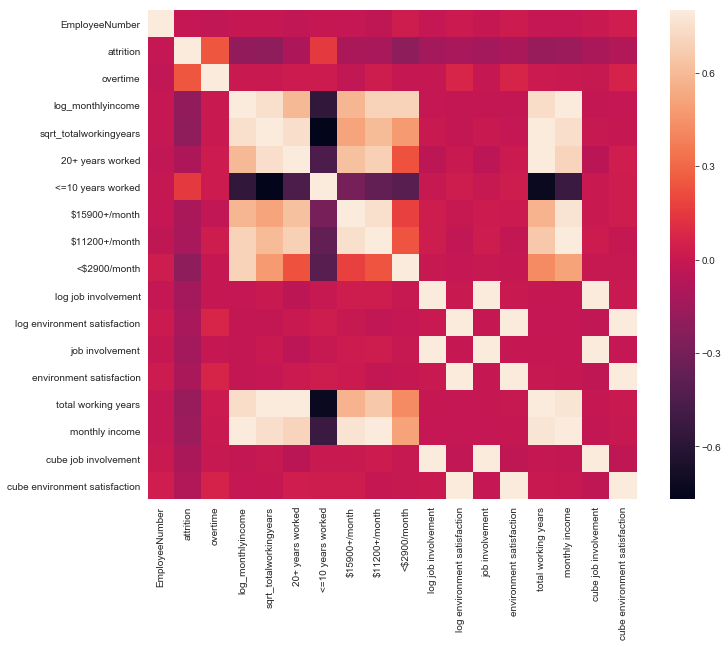

In [330]:
features.head(20)
corrmat = features.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()